## **RESEARCH INTEREST**

 The term Fortune 500 refers to a list of 500 of the largest companies compiled by Fortune magazine every year. Companies are ranked by their annual revenues for their respective fiscal years. This list includes both public and private companies using publicly available revenue data. A job with a Fortune 500 employer is a different world from most other employers. Usually, Company names are very well known, across many states or even the globe. That can be very good for one's career. Some of these companies are so consistent with their annual revenues that they understand that their workforce is a key to their success. Many of the Fortune 500 are included on the CNN Money’s list of 100 best companies to work for.

### ***PROJECT***

In this project we will see the graphical representation of Fortune 500 all over the world with respect there revenues, profits, number of employees in each organization. We will also plot the headquaters of each company.

**Data Source:** Utilizing data from someka website which has the CSV file with the Rank, Revenues, Revenue Change, Profits, Profit Change, Assets,Number of Employees of the Fortune 500 companies

**Datalink:** https://fortune.com/analytics

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import folium
import plotly.express as px

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.8 MB/s eta 0:00:00


### ***Geographic map of the world boundaries***
We will import the shape file from internet and plot a world shape file.

In [ ]:
! wget -q -O world-administrative-boundaries.zip https://docs.google.com/uc?id=1Nhciw6gPCoA6L98N4Kw0fKNT-Caf4e8_&export=download

zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
world_boundaries=gpd.read_file('world-administrative-boundaries.shp') #load the shapefile with gpd as world_boundaries

In [ ]:
world_boundaries.dtypes #checking the data types of the world boundaries

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [ ]:
world_boundaries.columns #displaying the columns of the world boundaries dataframe

Index(['iso3', 'status', 'color_code', 'Country', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

<Axes: >

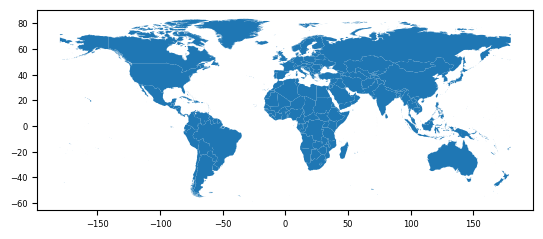

In [ ]:
world_boundaries.plot() #ploting the world map

***Importing data of fortune 500 companies all over the world***

Here we import the fortune 500 companies data from the someka website which has the CSV file with the Rank, Revenues, Revenue Change, Profits, Profit Change, Assets,Number of Employees. We are importing this file from GitHub using `!wget`.

In [ ]:
! wget -q -O Fortune-500.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/KazaGeetanjali-GISAssignments/Fortune-500.csv

Fortune_500_Dataset = pd.read_csv("Fortune-500.csv", encoding='latin1') #reading the file from GIThub and encoding the special characters present in the file
Fortune_500_Dataset.head() #Displaying rows
#! cat Fortune-500.csv

,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues ($millions),Revenue Change,Profits ($millions),Profit Change,Assets ($millions)
0,1,Walmart,U.S.,2100000,1,611289,0.067,11680,-0.146,243197
1,2,Saudi Aramco,Saudi Arabia,70496,6,603651,0.508,159069,0.51,663541
2,3,State Grid,China,870287,3,530009,0.151,8192,0.148,710763
3,4,Amazon,U.S.,1541000,2,513983,0.094,-2722,-1.082,462675
4,5,China National Petroleum,China,1087049,4,483019,0.173,21080,1.187,637223


In [ ]:
Fortune_500_Dataset.columns #displaying the columns before the merge

Index(['Rank', 'Company Name', 'Country', 'Number of Employees',
       'Previous Rank', 'Revenues ($millions)', 'Revenue Change',
       'Profits ($millions)', 'Profit Change', 'Assets ($millions)'],
      dtype='object')

## **Changing both DataFrames to create Join/Merge**

To create a merge we change the country names to upper case and remove any leading or tailing spaces, replace specail charaters if present.

We also change the column name so that both dataframes have the same column names for country.

We also change the value for country column so that both dataframes are inline with each other

In [ ]:
world_boundaries['name'] = world_boundaries['name'].str.upper().str.replace(' ', '').str.replace('.', '') #making the column data similar to the other data to merge on this column
Fortune_500_Dataset['Country'] = Fortune_500_Dataset['Country'].str.upper().str.replace(' ', '').str.replace('.', '') #turning the column data to upper case and replacing special charaters with no space

<ipython-input-9-0f06554a897b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  world_boundaries['name'] = world_boundaries['name'].str.upper().str.replace(' ', '').str.replace('.', '')
<ipython-input-9-0f06554a897b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Fortune_500_Dataset['Country'] = Fortune_500_Dataset['Country'].str.upper().str.replace(' ', '').str.replace('.', '')


In [ ]:
world_boundaries = world_boundaries.rename(columns = {'name':'Country'}) #replacing the column name to create merge
world_boundaries.columns #printing the column names after renaming

Index(['iso3', 'status', 'color_code', 'Country', 'continent', 'region',
       'iso_3166_1_', 'french_shor', 'geometry'],
      dtype='object')

In [ ]:
Fortune_500_Dataset['Country'] = Fortune_500_Dataset['Country'].replace('US','UNITEDSTATESOFAMERICA')  #replacing the column values to create merge
print(Fortune_500_Dataset.Country.to_string(index=False)) #printing the column values after changing

UNITEDSTATESOFAMERICA
          SAUDIARABIA
                CHINA
UNITEDSTATESOFAMERICA
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
              BRITAIN
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
            SINGAPORE
                CHINA
UNITEDSTATESOFAMERICA
              GERMANY
              GERMANY
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
                JAPAN
               FRANCE
          SWITZERLAND
              BRITAIN
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
           SOUTHKOREA
UNITEDSTATESOFAMERICA
               TAIWAN
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
          NETHERLANDS
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
UNITEDSTATESOFAMERICA
                CHINA
                CHINA
UNITEDSTATESOFAMERICA
               RUSSIA
                CHINA
                CHINA
                CHINA
                JAPAN
UNITEDSTAT

***Inner/Outer Merge***
Joining two data frames on the country column

*Inner Join:* An Inner Join returns only the matching rows between the two tables based on a specified condition.

*Outer Join:* An Outer Join returns all the rows from one table and matching rows from the other table based on a specified condition.


In [ ]:
Fortune_inner_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'inner', indicator = True) #inner join based on country column

Fortune_outer_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'outer', indicator = True)  #outer join based on country column

Fortune_inner_join[['Company Name','Country','Revenues ($millions)']]

,Company Name,Country,Revenues ($millions)
0,TotalEnergies,FRANCE,263310
1,Electricité de France,FRANCE,150902
2,Engie,FRANCE,109175
3,AXA,FRANCE,109067
4,Carrefour,FRANCE,90062
...,...,...,...
459,Xinjiang Guanghui Industry Investment,CHINA,30922
460,Petronas,MALAYSIA,85365
461,Volvo,SWEDEN,46828
462,BHP Group,AUSTRALIA,71502


In [ ]:
Fortune_inner_join.dtypes #checking the data types after the join

iso3                      object
status                    object
color_code                object
Country                   object
continent                 object
region                    object
iso_3166_1_               object
french_shor               object
geometry                geometry
Rank                       int64
Company Name              object
Number of Employees        int64
Previous Rank             object
Revenues ($millions)       int64
Revenue Change            object
Profits ($millions)        int64
Profit Change             object
Assets ($millions)         int64
_merge                  category
dtype: object

<Axes: >

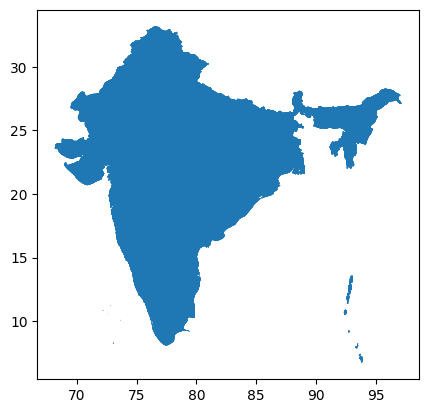

In [ ]:
Fortune_inner_join.loc[Fortune_inner_join['Country']=="INDIA"].plot() #ploting an individual map after the merge

In [ ]:
Fortune_outer_join._merge.value_counts() #counts the division of the merges

both          464
left_only     226
right_only     36
Name: _merge, dtype: int64

<Axes: >

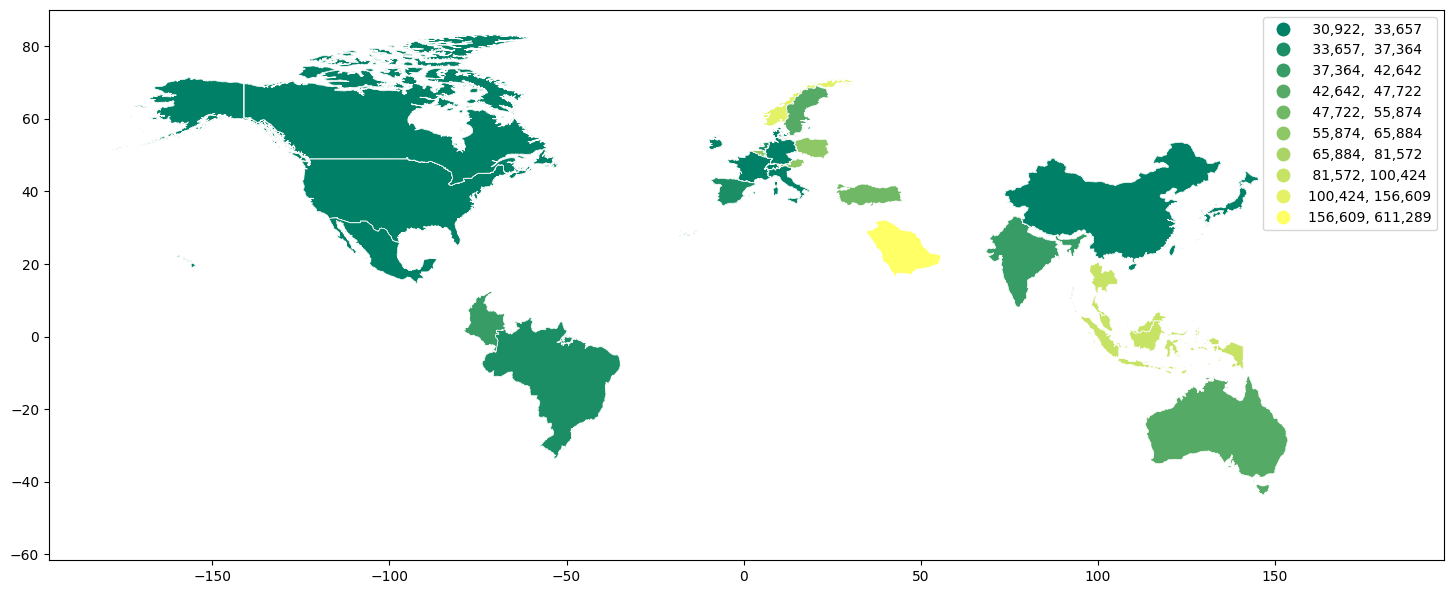

In [ ]:
#ploting the outer join dataframe
Fortune_outer_join.plot(figsize=(18,12), #sets the sze of the map
                        column='Revenues ($millions)', #sets the column for the map
                        legend=True, #print the box with the ploting values
                        cmap='summer', #setting the colors to the division
                        scheme='quantiles', #describing how the division should happen
                        k=10, #setting how many divisions should happen
                        edgecolor='w', #setting the edge color to the boundaries
                        linewidth=0.5, #setting the width of the line
                        legend_kwds= {'bbox_to_anchor': (1, 1),"fmt": "{:,.0f}"}) #customizing the legend

<Axes: >

[]

[]

'plt.figtext(0.5, 0.01,\n            \'\'\'data from www.someka.net\'\'\',\n            ha="center", fontsize=8)'

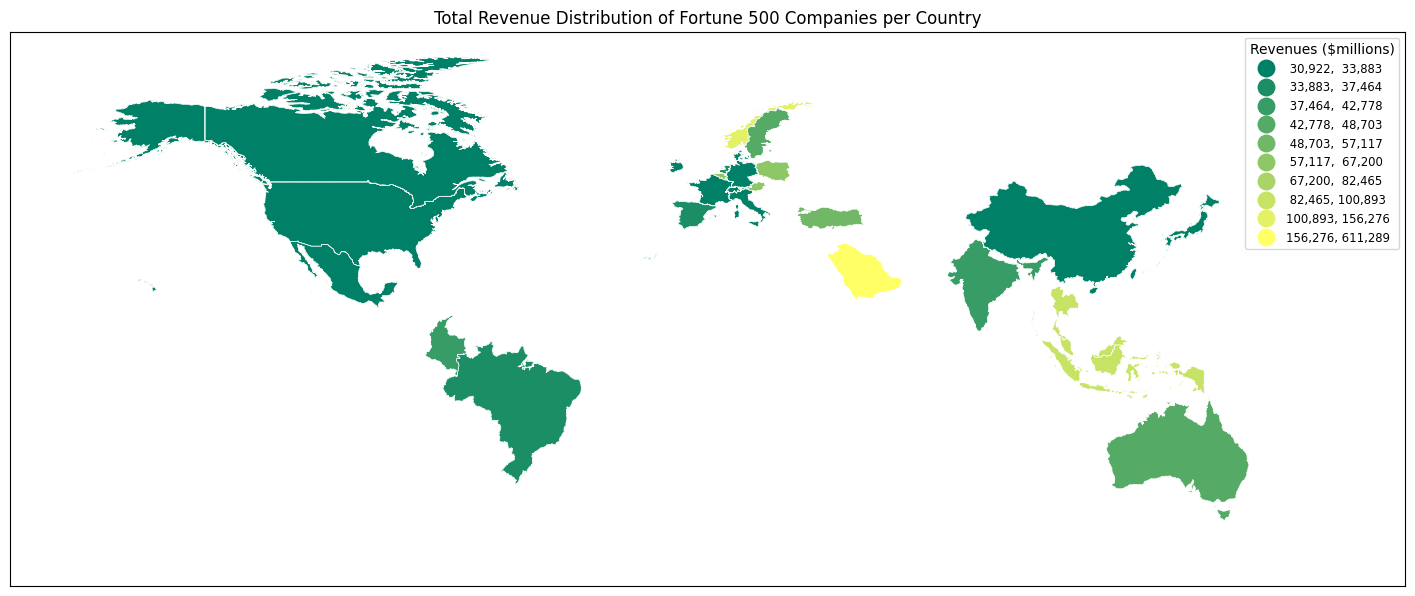

In [ ]:
#ploting the inner join dataframe
fig, ax = plt.subplots(figsize=(18,12))  #sets the sze of the map
Fortune_inner_join.plot(ax=ax,
                        column='Revenues ($millions)',
                        legend=True,
                        cmap='summer',
                        scheme='quantiles',
                        k=10,
                        edgecolor='w',
                        linewidth=0.5,
                        legend_kwds= {'bbox_to_anchor': (1, 1),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'medium',
                        'fontsize':'small'})

legend_details = ax.get_legend()
legend_details.set_title("Revenues ($millions)") #setting the tittle for the legend
ax.title.set_text("Total Revenue Distribution of Fortune 500 Companies per Country") #setting the tittle for the map
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
"""plt.figtext(0.5, 0.01,
            '''data from www.someka.net''',
            ha="center", fontsize=8)"""
plt.show()


In [ ]:
df = pd.DataFrame(Fortune_inner_join)

# Save the dataframe to a CSV file
df.to_csv('Fortune_inner_join.csv', index=False)

In [ ]:
Fortune_outer_join.isnull().any()

iso3                     True
status                   True
color_code               True
Country                 False
continent                True
region                   True
iso_3166_1_              True
french_shor              True
geometry                 True
Rank                     True
Company Name             True
Number of Employees      True
Previous Rank            True
Revenues ($millions)     True
Revenue Change           True
Profits ($millions)      True
Profit Change            True
Assets ($millions)       True
_merge                  False
dtype: bool

In [ ]:
Fortune_outer_join.isnull().sum()

In [ ]:
Fortune_right_join = pd.merge(world_boundaries, Fortune_500_Dataset, on = 'Country', how = 'right', indicator = False)
Fortune_right_join.isnull().any()

iso3                     True
status                   True
color_code               True
Country                 False
continent                True
region                   True
iso_3166_1_              True
french_shor              True
geometry                 True
Rank                    False
Company Name            False
Number of Employees     False
Previous Rank           False
Revenues ($millions)    False
Revenue Change          False
Profits ($millions)     False
Profit Change           False
Assets ($millions)      False
dtype: bool

In [ ]:
Fortune_right_join.isnull().sum()

iso3                    36
status                  36
color_code              36
Country                  0
continent               36
region                  36
iso_3166_1_             36
french_shor             36
geometry                36
Rank                     0
Company Name             0
Number of Employees      0
Previous Rank            0
Revenues ($millions)     0
Revenue Change           0
Profits ($millions)      0
Profit Change            0
Assets ($millions)       0
dtype: int64

In [ ]:
# computing number of rows
rows = len(Fortune_right_join.axes[0])

# computing number of columns
cols = len(Fortune_right_join.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  500
Number of Columns:  18


In [ ]:
country_List = Fortune_inner_join['Country']

# converting the list to a Series and counting the values
country_count = pd.Series(country_List).value_counts()
country_count

UNITEDSTATESOFAMERICA    136
CHINA                    135
JAPAN                     41
GERMANY                   30
FRANCE                    24
CANADA                    14
SWITZERLAND               11
NETHERLANDS               10
BRAZIL                     9
SPAIN                      8
INDIA                      8
TAIWAN                     7
ITALY                      5
DENMARK                    3
MEXICO                     3
IRELAND                    3
SINGAPORE                  3
AUSTRALIA                  2
THAILAND                   1
NORWAY                     1
INDONESIA                  1
BELGIUM                    1
POLAND                     1
TURKEY                     1
COLOMBIA                   1
LUXEMBOURG                 1
AUSTRIA                    1
MALAYSIA                   1
SWEDEN                     1
SAUDIARABIA                1
Name: Country, dtype: int64

In [ ]:
country_count_df= country_count.to_frame(name='count_of_companies_country')
country_count_df['Country'] = country_count_df.index
country_count_df.columns

Index(['count_of_companies_country', 'Country'], dtype='object')

In [ ]:
country_count_df

,count_of_companies_country,Country
UNITEDSTATESOFAMERICA,136,UNITEDSTATESOFAMERICA
CHINA,135,CHINA
JAPAN,41,JAPAN
GERMANY,30,GERMANY
FRANCE,24,FRANCE
CANADA,14,CANADA
SWITZERLAND,11,SWITZERLAND
NETHERLANDS,10,NETHERLANDS
BRAZIL,9,BRAZIL
SPAIN,8,SPAIN


In [ ]:
FortuneCount_inner_join = pd.merge(world_boundaries, country_count_df, on = 'Country', how = 'inner', indicator = False)

FortuneCount_outer_join = pd.merge(world_boundaries, country_count_df, on = 'Country', how = 'outer', indicator = False)

<Axes: >

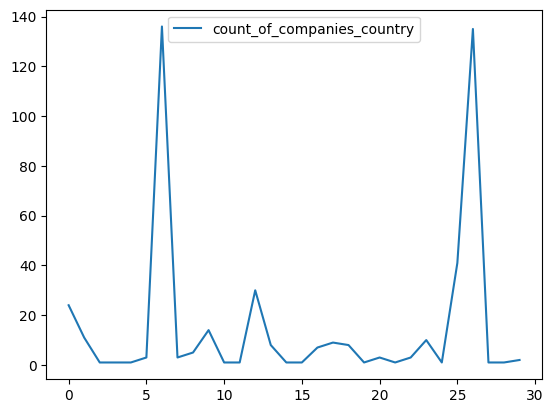

In [ ]:
companies_Per_Country= FortuneCount_inner_join[['Country','count_of_companies_country']]
companies_Per_Country.plot()

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:257: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 8.
  warnings.warn(


<Axes: >

[]

[]

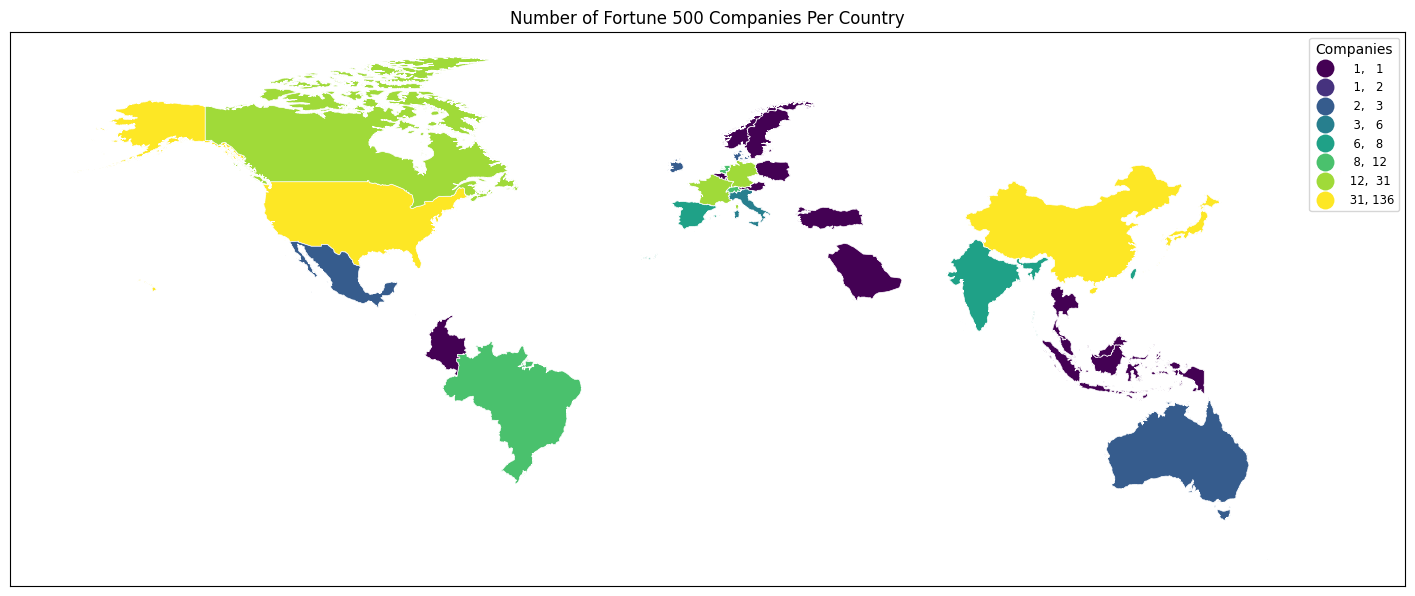

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))
FortuneCount_inner_join.plot(ax=ax,
                        column='count_of_companies_country',
                        legend=True,
                        cmap='viridis',
                        scheme='quantiles',
                        k=10,
                        edgecolor='w',
                        linewidth=0.5,
                        legend_kwds= {'bbox_to_anchor': (1, 1),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'medium',
                        'fontsize':'small'})
leg1 = ax.get_legend()
leg1.set_title("Companies")
ax.title.set_text("Number of Fortune 500 Companies Per Country")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()

In [ ]:
! wget -q -O Fortune_500_Corporate_Headquarters.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/KazaGeetanjali-GISAssignments/Fortune_500_Corporate_Headquarters.csv

Fortune_500_Corporate_Address = pd.read_csv("Fortune_500_Corporate_Headquarters.csv", encoding='latin1')
Fortune_500_Corporate_Address.head()

,ï»¿X,Y,FID,OBJECTID,RANK,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,PRC,COUNTYFIPS,COMMENTS,WEBSITE,PROFIT,GlobalID,CreationDate,Creator,EditDate,Editor
0,-1.293321e+07,5.403709e+06,1,1,49,ALBERTSONS COS.,250 PARKCENTER BOULEVARD,NOT AVAILABLE,BOISE,ID,...,ADDRESS,16001,NOT AVAILABLE,HTTPS://WWW.ALBERTSONS.COM/#1,-502.2,{A7574C1C-884F-48A8-A612-51202F5036DF},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD
1,-1.292942e+07,5.392879e+06,2,2,226,MICRON TECHNOLOGY,8000 SOUTH FEDERAL WAY,NOT AVAILABLE,BOISE,ID,...,ADDRESS,16001,NOT AVAILABLE,HTTPS://WWW.MICRON.COM/,-276.0,{3C4FFBAF-B76E-435E-9B5F-D93C995F5720},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD
2,-8.842930e+06,4.313449e+06,3,3,290,LABORATORY CORP. OF AMERICA,358 SOUTH MAIN STREET,NOT AVAILABLE,BURLINGTON,NC,...,ADDRESS,37001,NOT AVAILABLE,HTTPS://WWW.LABCORP.COM/,732.1,{95021691-694A-4761-90C9-E5E1DE52DC1F},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD
3,-1.357618e+07,4.507432e+06,4,4,440,LAM RESEARCH,4650 CUSHING PARKWAY,NOT AVAILABLE,FREMONT,CA,...,ADDRESS,6001,NOT AVAILABLE,HTTPS://WWW.LAMRESEARCH.COM/,914.0,{1C7A6B3E-5EB8-46D7-81B9-E1A6113187A2},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD
4,-1.357871e+07,4.508509e+06,5,5,198,SYNNEX,44201 NOBEL DRIVE,NOT AVAILABLE,FREMONT,CA,...,ADDRESS,6001,NOT AVAILABLE,HTTPS://WWW.SYNNEXCORP.COM/,234.9,{D8F8FE15-E3C1-4848-8D28-141470CE17F5},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD


In [ ]:
longi= Fortune_500_Corporate_Address['LONGITUDE']
lat = Fortune_500_Corporate_Address['LATITUDE']

In [ ]:
fig = px.scatter_mapbox(Fortune_500_Corporate_Address,
                        lat="LATITUDE",
                        lon="LONGITUDE",
                        hover_name="NAME",
                        hover_data=["RANK","EMPLOYEES","WEBSITE","COUNTY"],
                        zoom=3,
                        height=600,
                        size= 'EMPLOYEES',
                        opacity=0.8,
                        width=1300)
fig.update_layout(mapbox_style='stamen-terrain',title_text="Fortune 500 Companies")
#fig.update_layout(title_text="Fortune 500 Companies")
#fig.show()

In [ ]:
mapObj= folium.Map(
    location=[35.6912809,-116.9880973],
    zoom_start=4)
folium.TileLayer('openstreetmap').add_to(mapObj)
folium.TileLayer('stamenterrain', attr="stamenterrain").add_to(mapObj)
folium.TileLayer('stamenwatercolor', attr="stamenwatercolor").add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Maps').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Satellite').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Terrain').add_to(mapObj)
folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',attr = 'Google',name = 'Google Satellite Hybrid').add_to(mapObj)
for row in range(len(Fortune_500_Corporate_Address)):
  folium.Marker(location=[Fortune_500_Corporate_Address.loc[row, "LATITUDE"], Fortune_500_Corporate_Address.loc[row, "LONGITUDE"]],
              icon=folium.Icon(icon='area-chart', prefix='fa', color='red'),
              popup=folium.Popup(Fortune_500_Corporate_Address.loc[row, "NAME"], max_width=500),
              tooltip= Fortune_500_Corporate_Address.loc[row, "NAME"]
              ).add_to(mapObj)

folium.LayerControl().add_to(mapObj)
mapObj

In [ ]:
geograph_Map = folium.Map([4,1], zoom_start = 2.4, title = 'Fortune 500 Companies per Country')
folium.GeoJson(world_boundaries.to_json()).add_to(geograph_Map)
geograph_Map

In [ ]:
Fortune_500_Total_EMPLOYEES = Fortune_500_Corporate_Address["EMPLOYEES"]
Fortune_500_NAME = Fortune_500_Corporate_Address["STATE"]
Fortune_500_RANK = Fortune_500_Corporate_Address["RANK"]

<BarContainer object of 500 artists>

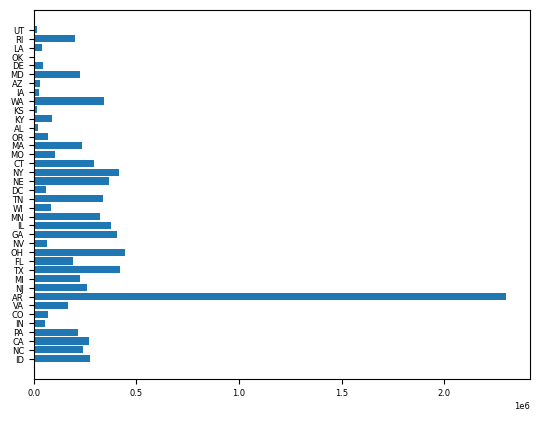

In [ ]:
plt.rc('font', size=6)
plt.barh(Fortune_500_NAME,Fortune_500_Total_EMPLOYEES)

In [ ]:
Fortune_500_Corporate_Address.dtypes

ï»¿X            float64
Y               float64
FID               int64
OBJECTID          int64
RANK              int64
NAME             object
ADDRESS          object
ADDRESS2         object
CITY             object
STATE            object
ZIP               int64
COUNTY           object
EMPLOYEES         int64
REVENUES          int64
LATITUDE        float64
LONGITUDE       float64
SOURCE           object
PRC              object
COUNTYFIPS        int64
COMMENTS         object
WEBSITE          object
PROFIT          float64
GlobalID         object
CreationDate     object
Creator          object
EditDate         object
Editor           object
dtype: object

<Axes: >

<Axes: >

[]

[]

Text(0.5, 0.1, 'data from www.someka.net')

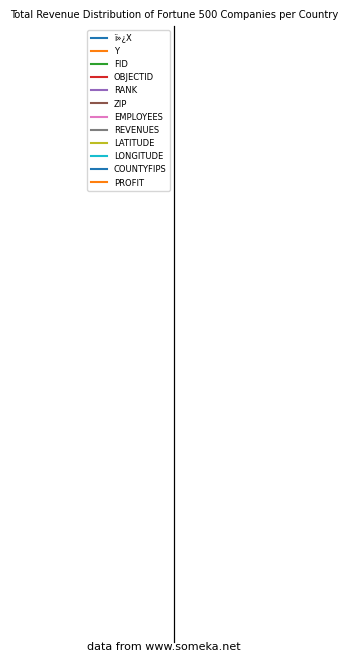

In [ ]:
fig, ax = plt.subplots(1,figsize=(8,8))
world_boundaries.plot(ax=ax, color='white', edgecolor='greenyellow',linewidth=1)
Fortune_500_Corporate_Address.plot(ax=ax)
ax.title.set_text("Total Revenue Distribution of Fortune 500 Companies per Country")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.annotate('Note added to chart with minimum parameters', xy = (200000, 1000))
plt.figtext(0.5, 0.1,
            '''data from www.someka.net''',
            ha="center", fontsize=8, #bbox={"facecolor":"white", "alpha":0.5, "pad":5}
            )

In [ ]:
from shapely.geometry import Point

In [ ]:
list(zip(Fortune_500_Corporate_Address["LONGITUDE"],Fortune_500_Corporate_Address["LATITUDE"]))

[(-116.18099, 43.59974),
 (-116.14697, 43.52925),
 (-79.43739, 36.09317),
 (-121.95694, 37.4886),
 (-121.97965, 37.49628),
 (-121.89039, 37.71041),
 (-122.27237, 37.80348),
 (-80.2658, 40.50779),
 (-79.99485, 40.44136),
 (-80.00437, 40.43329),
 (-80.00051, 40.44129),
 (-80.00357, 40.43992),
 (-85.23743, 41.0411),
 (-104.89224, 39.60092),
 (-104.88214, 39.581553),
 (-104.86745, 39.5482),
 (-104.85536, 39.54506),
 (-104.84571, 39.55318),
 (-104.84571, 39.55318),
 (-104.84492, 39.54685),
 (-77.11261, 38.87985),
 (-77.07012, 38.89465),
 (-85.92326, 39.20402),
 (-94.21763, 36.36477),
 (-94.14745, 36.2453),
 (-74.1272, 40.89756),
 (-74.20762, 41.01613),
 (-74.17075, 41.07444),
 (-74.00657, 40.87398),
 (-86.44101, 42.14912),
 (-98.47939, 29.49244),
 (-98.42136, 29.624432),
 (-98.606, 29.58919),
 (-98.45941, 29.6161),
 (-98.573, 29.53455),
 (-80.63837, 28.0913),
 (-105.0992, 39.91172),
 (-105.14427, 39.9206),
 (-80.14419, 26.12002),
 (-74.80758, 40.09215),
 (-84.52325, 39.30823),
 (-84.42792, 

In [ ]:
from shapely import geometry
points_geo= [Point(xy) for xy in zip(Fortune_500_Corporate_Address["LONGITUDE"],Fortune_500_Corporate_Address["LATITUDE"])]

In [ ]:
gdf1= gpd.GeoDataFrame(Fortune_500_Corporate_Address, crs={'init': 'epsg:4326'}, geometry=points_geo)
gdf1

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,ï»¿X,Y,FID,OBJECTID,RANK,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,COUNTYFIPS,COMMENTS,WEBSITE,PROFIT,GlobalID,CreationDate,Creator,EditDate,Editor,geometry
0,-1.293321e+07,5.403709e+06,1,1,49,ALBERTSONS COS.,250 PARKCENTER BOULEVARD,NOT AVAILABLE,BOISE,ID,...,16001,NOT AVAILABLE,HTTPS://WWW.ALBERTSONS.COM/#1,-502.2,{A7574C1C-884F-48A8-A612-51202F5036DF},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-116.18099 43.59974)
1,-1.292942e+07,5.392879e+06,2,2,226,MICRON TECHNOLOGY,8000 SOUTH FEDERAL WAY,NOT AVAILABLE,BOISE,ID,...,16001,NOT AVAILABLE,HTTPS://WWW.MICRON.COM/,-276.0,{3C4FFBAF-B76E-435E-9B5F-D93C995F5720},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-116.14697 43.52925)
2,-8.842930e+06,4.313449e+06,3,3,290,LABORATORY CORP. OF AMERICA,358 SOUTH MAIN STREET,NOT AVAILABLE,BURLINGTON,NC,...,37001,NOT AVAILABLE,HTTPS://WWW.LABCORP.COM/,732.1,{95021691-694A-4761-90C9-E5E1DE52DC1F},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-79.43739 36.09317)
3,-1.357618e+07,4.507432e+06,4,4,440,LAM RESEARCH,4650 CUSHING PARKWAY,NOT AVAILABLE,FREMONT,CA,...,6001,NOT AVAILABLE,HTTPS://WWW.LAMRESEARCH.COM/,914.0,{1C7A6B3E-5EB8-46D7-81B9-E1A6113187A2},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-121.95694 37.48860)
4,-1.357871e+07,4.508509e+06,5,5,198,SYNNEX,44201 NOBEL DRIVE,NOT AVAILABLE,FREMONT,CA,...,6001,NOT AVAILABLE,HTTPS://WWW.SYNNEXCORP.COM/,234.9,{D8F8FE15-E3C1-4848-8D28-141470CE17F5},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-121.97965 37.49628)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-9.784044e+06,5.206344e+06,496,496,111,ABBVIE,1 NORTH WAUKEGAN,NOT AVAILABLE,NORTH CHICAGO,IL,...,17097,NOT AVAILABLE,HTTPS://WWW.ABBVIE.COM/,5953.0,{8B0E310D-9586-4EBD-AAF8-76501AED4026},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-87.89156 42.30212)
496,-8.367717e+06,4.859359e+06,497,497,31,COMCAST,1701 JOHN F KENNEDY BOULEVARD,COMCAST CENTER,PHILADELPHIA,PA,...,42101,NOT AVAILABLE,HTTPS://CORPORATE.COMCAST.COM/,8695.0,{A860B365-3B9B-4F49-AA44-255962AA4DBE},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-75.16848 39.95468)
497,-9.407100e+06,4.736452e+06,498,498,36,PROCTER & GAMBLE,1 PROCTER AND GAMBLE PLAZA,NOT AVAILABLE,CINCINNATI,OH,...,39061,NOT AVAILABLE,HTTPS://US.PG.COM/,10508.0,{981D0B05-CE5A-415F-A89C-4CD9949BE423},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-84.50542 39.10311)
498,-1.038271e+07,5.617628e+06,499,499,239,AMERIPRISE FINANCIAL,55 AMERIPRISE FINANCIAL CENTER,AMERIPRISE FINANCIAL CENTER,MINNEAPOLIS,MN,...,27053,NOT AVAILABLE,HTTPS://WWW.AMERIPRISE.COM/,1314.0,{58D4BFB3-4EA4-4556-BD31-C084A10D655F},2021/12/16 14:56:43+00,HostedByHIFLD,2021/12/16 14:56:43+00,HostedByHIFLD,POINT (-93.26949 44.97526)


<Axes: >

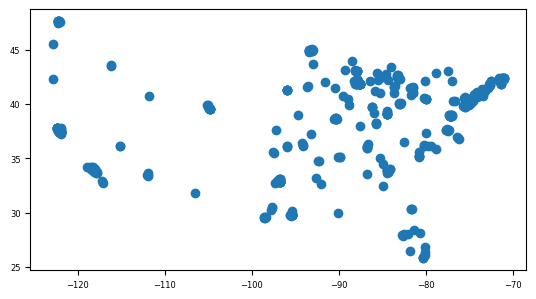

In [ ]:
gdf1.plot()

AttributeError: ignored

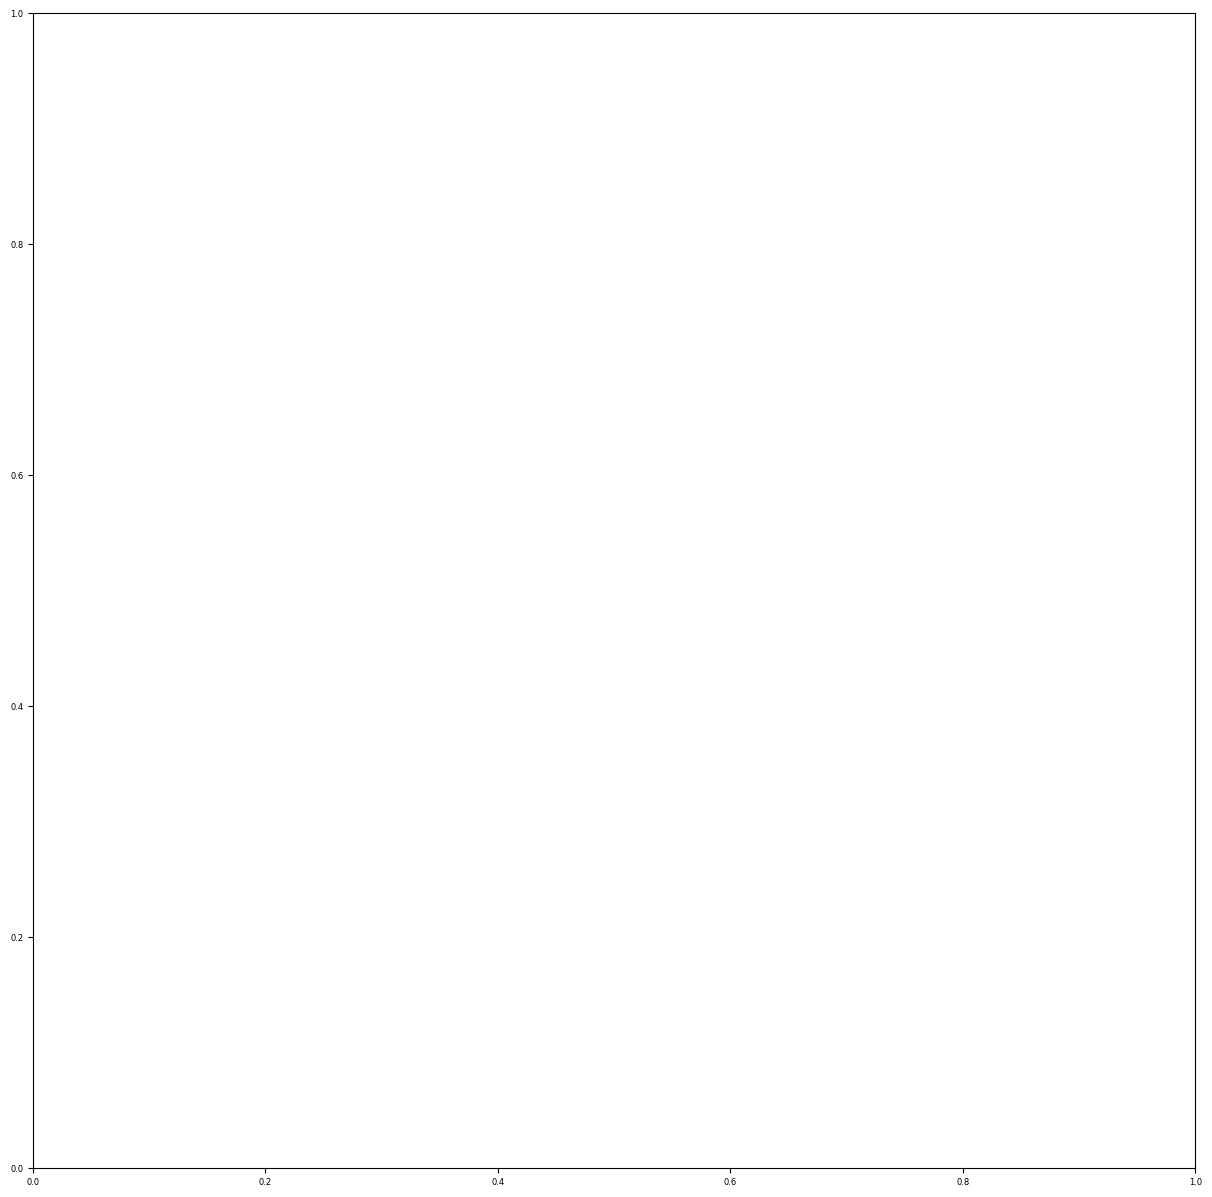

In [ ]:
#ax= world_boundaries.plot(figsize=(15, 15), edgecolor= 'blue')
Fortune_500_Corporate_Address.plot(color='cyan', markersize=10,figsize=(15, 15), edgecolor= 'blue')